In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [280]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploratory Data Analysis

In [281]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [282]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### Lets check the null values without using visualization

In [283]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

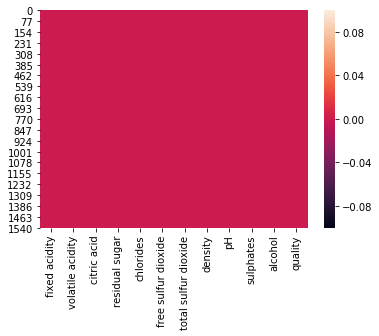

In [284]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [285]:
data = pd.DataFrame(data=data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [286]:
data.shape

(1599, 12)

In [287]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [288]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [289]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [290]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [291]:
dfcor = data.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [292]:
dfcor = data.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


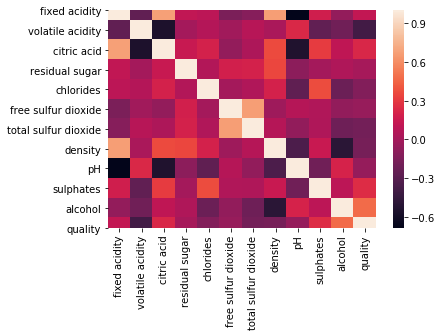

In [293]:
sns.heatmap(dfcor)

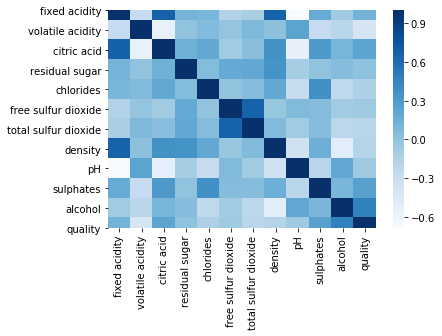

In [294]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

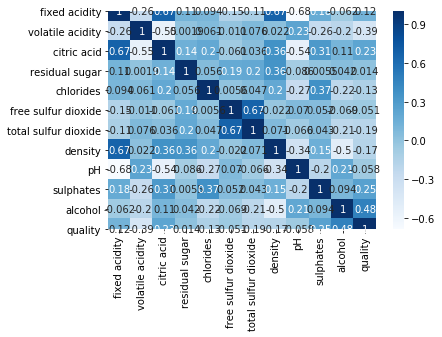

In [295]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [296]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1599, 12)
(1451, 12)


#### Checking Skewness and Removing it

In [297]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [298]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [299]:
#Lets Again Check the Skewness
data.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

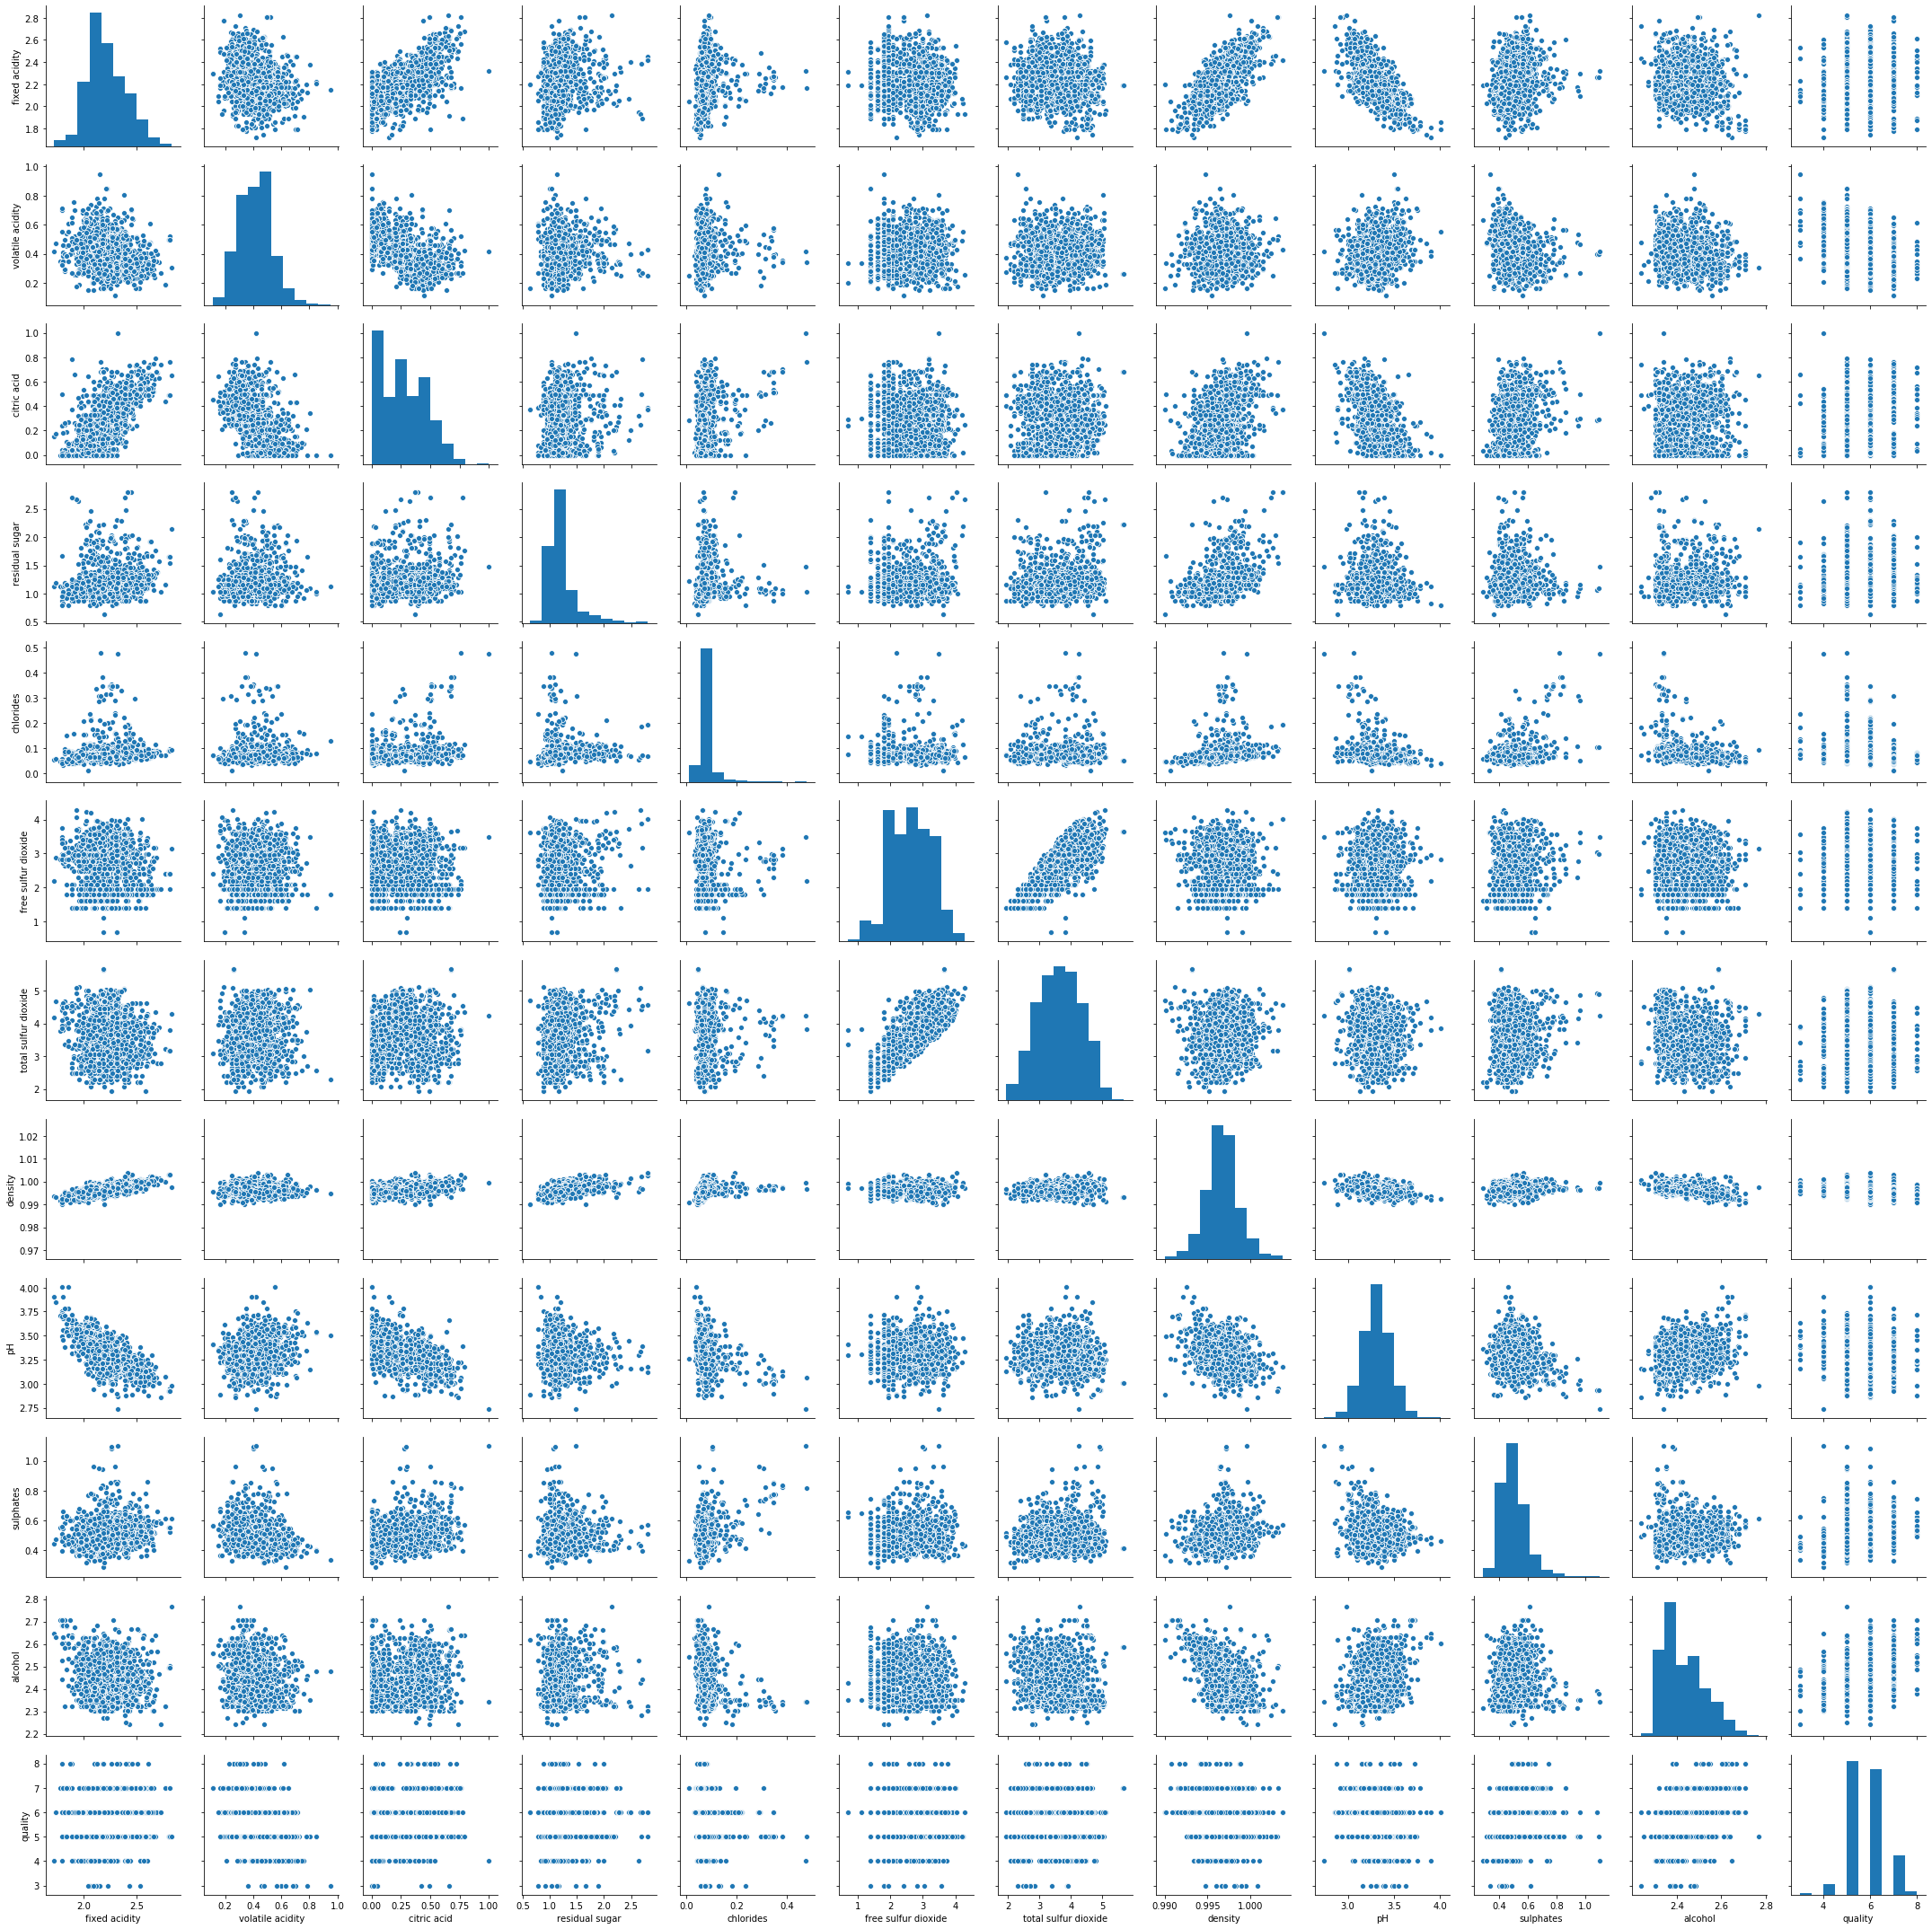

In [300]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

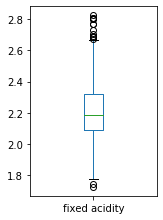

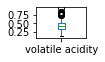

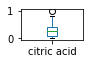

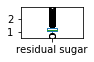

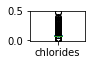

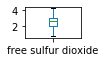

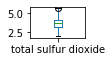

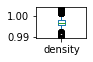

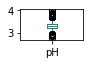

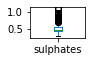

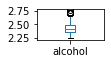

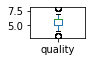

In [301]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

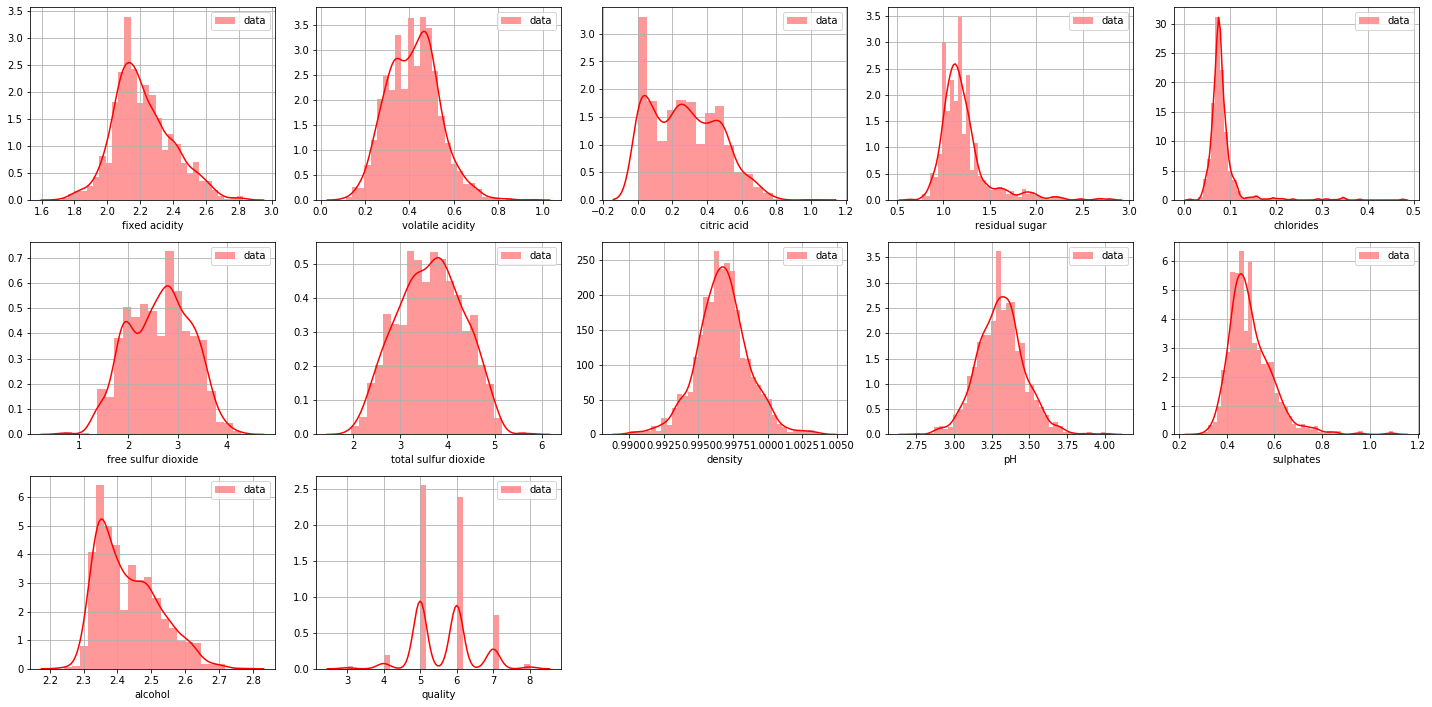

In [302]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [303]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Plotting Data using scatter plot

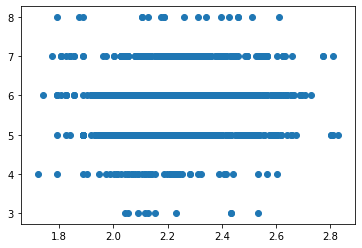

In [304]:
plt.scatter(data['fixed acidity'],data['quality'])

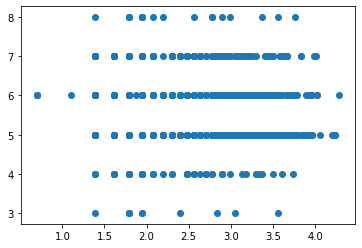

In [305]:
plt.scatter(data['free sulfur dioxide'],data['quality'])

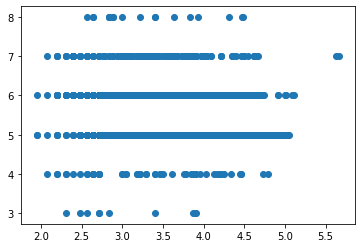

In [306]:
plt.scatter(data['total sulfur dioxide'],data['quality'])

#### Column Plot

In [307]:
collist = data.columns.values
ncols=12
nrows=10

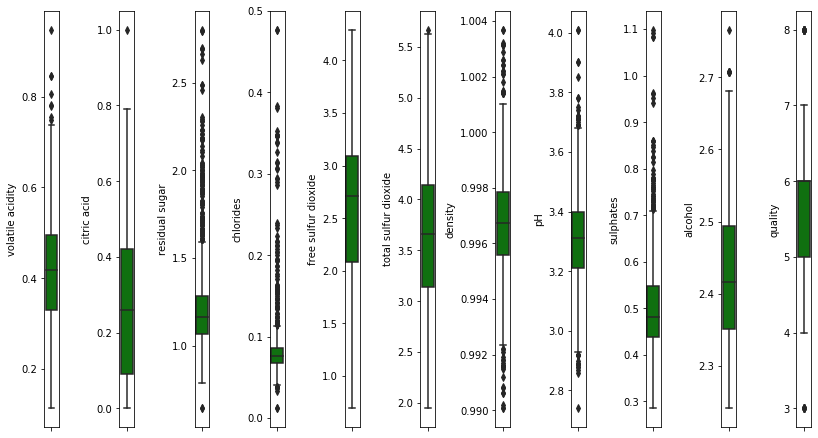

In [308]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Checking Correlation of other columns/features with Quality(Target Variable)

In [309]:
correlations = data.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.115684
volatile acidity       -0.393391
citric acid             0.226373
residual sugar          0.021687
chlorides              -0.134818
free sulfur dioxide    -0.050344
total sulfur dioxide   -0.171419
density                -0.174919
pH                     -0.057731
sulphates               0.280984
alcohol                 0.477002
Name: quality, dtype: float64


#### Here we are dropping free sulfur dioxide and pH column due to low correlation with Traget variable

In [310]:
data.drop("free sulfur dioxide",axis=1,inplace=True)

In [311]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,3.51,0.444686,2.341806,5
1,2.174752,0.631272,0.00,1.280934,0.093490,4.219508,0.99680,3.20,0.518794,2.379546,5
2,2.174752,0.565314,0.04,1.193922,0.088011,4.007333,0.99700,3.26,0.500775,2.379546,5
3,2.501436,0.246860,0.56,1.064711,0.072321,4.110874,0.99800,3.16,0.457425,2.379546,6
4,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,3.51,0.444686,2.341806,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.806662,0.99490,3.45,0.457425,2.442347,5
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.951244,0.99512,3.52,0.565314,2.501436,6
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.713572,0.99574,3.42,0.559616,2.484907,6
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.806662,0.99547,3.57,0.536493,2.415914,5


In [312]:
data.drop("pH",axis=1,inplace=True)

In [313]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806,5
1,2.174752,0.631272,0.00,1.280934,0.093490,4.219508,0.99680,0.518794,2.379546,5
2,2.174752,0.565314,0.04,1.193922,0.088011,4.007333,0.99700,0.500775,2.379546,5
3,2.501436,0.246860,0.56,1.064711,0.072321,4.110874,0.99800,0.457425,2.379546,6
4,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806,5
...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.806662,0.99490,0.457425,2.442347,5
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.951244,0.99512,0.565314,2.501436,6
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.713572,0.99574,0.559616,2.484907,6
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.806662,0.99547,0.536493,2.415914,5


#### Separating X and Y variable

In [314]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806,5
1,2.174752,0.631272,0.00,1.280934,0.093490,4.219508,0.99680,0.518794,2.379546,5
2,2.174752,0.565314,0.04,1.193922,0.088011,4.007333,0.99700,0.500775,2.379546,5
3,2.501436,0.246860,0.56,1.064711,0.072321,4.110874,0.99800,0.457425,2.379546,6
4,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806,5
...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.806662,0.99490,0.457425,2.442347,5
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.951244,0.99512,0.565314,2.501436,6
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.713572,0.99574,0.559616,2.484907,6
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.806662,0.99547,0.536493,2.415914,5


In [315]:
X = data.drop("quality", axis=1)

In [316]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806
1,2.174752,0.631272,0.00,1.280934,0.093490,4.219508,0.99680,0.518794,2.379546
2,2.174752,0.565314,0.04,1.193922,0.088011,4.007333,0.99700,0.500775,2.379546
3,2.501436,0.246860,0.56,1.064711,0.072321,4.110874,0.99800,0.457425,2.379546
4,2.128232,0.530628,0.00,1.064711,0.073250,3.555348,0.99780,0.444686,2.341806
...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.806662,0.99490,0.457425,2.442347
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.951244,0.99512,0.565314,2.501436
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.713572,0.99574,0.559616,2.484907
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.806662,0.99547,0.536493,2.415914


In [317]:
Y = data["quality"]
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [318]:
X.shape

(1599, 9)

In [319]:
Y.shape

(1599,)

In [320]:
Y = Y.values.reshape(-1,1)

In [321]:
Y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [322]:
Y.shape

(1599, 1)

#### Applying Linear Regression

In [323]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.35,random_state=39)

In [324]:
train_X.shape

(1039, 9)

In [325]:
train_Y.shape

(1039, 1)

In [326]:
test_X.shape

(560, 9)

In [327]:
test_Y.shape

(560, 1)

In [328]:
lg = LinearRegression()

In [329]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
lg.coef_

array([[  0.77562222,  -1.57483456,  -0.33903515,   0.16866276,
         -1.65137657,  -0.09756727, -50.3179307 ,   1.77031477,
          2.68984632]])

In [331]:
lg.intercept_

array([47.66701418])

In [332]:
lg.score(train_X,train_Y)

0.34097946033798243

In [333]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[5.13370416]
 [5.35863986]
 [5.14125037]
 [5.31735924]
 [5.36836991]
 [6.39745011]
 [5.15878931]
 [5.2011784 ]
 [5.12631435]
 [5.55933716]
 [5.4031129 ]
 [5.08770097]
 [6.48154342]
 [5.29272534]
 [5.66044952]
 [5.98315625]
 [5.10300897]
 [5.21656809]
 [5.18994809]
 [5.43270146]
 [5.43270146]
 [5.09246991]
 [5.17500603]
 [5.90074059]
 [5.57371476]
 [5.28325822]
 [6.05000171]
 [5.08349502]
 [6.46471897]
 [5.23276207]
 [5.10964289]
 [5.32540799]
 [5.62008501]
 [6.24515464]
 [5.6436436 ]
 [5.32338513]
 [6.16421009]
 [5.96920056]
 [5.11738853]
 [5.78411767]
 [6.17768984]
 [5.26689434]
 [6.35301797]
 [5.31937986]
 [5.62333657]
 [5.07345935]
 [5.11270268]
 [5.1846779 ]
 [5.15616363]
 [5.81923887]
 [6.15526978]
 [5.37031085]
 [5.87142068]
 [5.64374321]
 [5.28479718]
 [5.55493234]
 [5.14375516]
 [6.26051584]
 [4.8546946 ]
 [5.59627936]
 [5.540487  ]
 [6.3716477 ]
 [6.41364914]
 [5.72648738]
 [5.47686924]
 [4.80731972]
 [5.13863633]
 [5.8285844 ]
 [5.78411767]
 [5.864734

In [334]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.5311867970265963
Mean sqaured error: 0.4593480007824074
Root mean squared error: 0.6777521676707552


#### Boost through GradientBoostRegressor By using Parameters

In [335]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [336]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6829964359896477
Mean squared error: 0.43
R2 Score: 0.43


#### Lets Visualize the Goodness of the Prediction

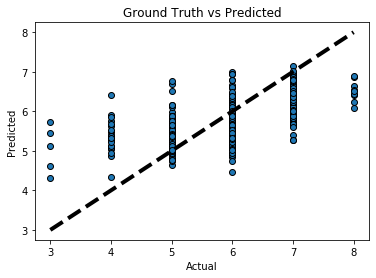

In [337]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [338]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [339]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [340]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.4070137490138952
r2 score corresponding to  43 is 0.38884509061313266
r2 score corresponding to  44 is 0.32143445414810123
r2 score corresponding to  45 is 0.33847418775983906
r2 score corresponding to  46 is 0.3129238424685279
r2 score corresponding to  47 is 0.3295253223790252
r2 score corresponding to  48 is 0.2996921369469161
r2 score corresponding to  49 is 0.3803710220145292
r2 score corresponding to  50 is 0.3034073046763289
r2 score corresponding to  51 is 0.2739993272932195
r2 score corresponding to  52 is 0.3453849441714937
r2 score corresponding to  53 is 0.37719492842344704
r2 score corresponding to  54 is 0.35963713094142447
r2 score corresponding to  55 is 0.369200364232826
r2 score corresponding to  56 is 0.3833943596426207
r2 score corresponding to  57 is 0.3005029767372728
r2 score corresponding to  58 is 0.34861989782588776
r2 score corresponding to  59 is 0.30508162434486974
r2 score corresponding to  60 is 0.3772388404938085
r2 sco

In [341]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression: 0.2964182480456774
Standard deviation in r2 scorefor Linear Regression: 0.07289149880171068


### Boosting Linear Regression

In [342]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2827963016672562
Standard deviation in r2 score for ada boosting Regression:  0.06813501531704924


### Prediction Using Naive Bayes Algo

In [343]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.465625
[[  0   0   2   0   0   0]
 [  0   0   8   0   0   0]
 [  0   0 130   3   0   0]
 [  0   0 113  19   0   0]
 [  0   0  21  19   0   0]
 [  0   0   1   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.47      0.98      0.64       133
           6       0.42      0.14      0.21       132
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         5

    accuracy                           0.47       320
   macro avg       0.15      0.19      0.14       320
weighted avg       0.37      0.47      0.35       320



### Multinomial NB by using Crossval Score

In [344]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.40909091 0.49090909 0.50909091 0.46788991 0.4537037  0.41666667
 0.45794393 0.46728972 0.51428571 0.4952381  0.49038462 0.45192308
 0.44230769 0.48076923 0.45192308]
Mean Scores 0.4666277556272983
Standard deviation 0.029801449529578652
Y Prediction values
[5 5 5 ... 5 5 5]


array([[  0,   0,  10,   0,   0,   0],
       [  0,   0,  49,   4,   0,   0],
       [  0,   0, 627,  54,   0,   0],
       [  0,   0, 511, 127,   0,   0],
       [  0,   0, 107,  92,   0,   0],
       [  0,   0,   8,  10,   0,   0]], dtype=int64)

### Pediction using Support Vector Machine

In [345]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.528125
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 92 41  0  0]
 [ 0  0 55 77  0  0]
 [ 0  0  4 36  0  0]
 [ 0  0  0  5  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.57      0.69      0.63       133
           6       0.48      0.58      0.53       132
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.18      0.21      0.19       320
weighted avg       0.44      0.53      0.48       320



### Support Vector Machine by using Crossval Score

In [346]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.5310559  0.5576324  0.5576324  0.54402516 0.57728707]
Mean Scores 0.5535265843215335
Standard Deviation 0.015449819858367358
Y Prediction values
[5 5 5 ... 6 5 6]


0.5534709193245778

### Use GridSearchCV for Support Vector Machine

In [347]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.531, total=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.493, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.480, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.465, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.428, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.429, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.429, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.428, total=   0.1s
[CV] C

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.543, total=   0.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.597, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.568, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.590, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.618, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.596, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.583, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [348]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [349]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.59      0.68      0.63       133
           6       0.52      0.61      0.56       132
           7       0.62      0.20      0.30        40
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.29      0.25      0.25       320
weighted avg       0.54      0.56      0.53       320



#### Boosting through Support Vector Classifier

In [350]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.421875


### Prediction Using DecisionTreeClassifier

In [351]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.6
[[ 0  0  1  1  0  0]
 [ 1  1  2  3  1  0]
 [ 1  3 88 35  6  0]
 [ 0  7 31 81 12  1]
 [ 0  0  8 11 21  0]
 [ 0  0  0  2  2  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.12      0.11         8
           5       0.68      0.66      0.67       133
           6       0.61      0.61      0.61       132
           7       0.50      0.53      0.51        40
           8       0.50      0.20      0.29         5

    accuracy                           0.60       320
   macro avg       0.40      0.35      0.36       320
weighted avg       0.61      0.60      0.60       320



### DecisionTreeClassifier by using Crossval Score

In [352]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.23691679 0.24943836 0.25840209 0.24702047 0.25419935]
Mean Scores 0.24919540890835207
Standard Deviation 0.007285002592310783
Y Prediction values
[5 5 5 ... 6 6 7]


array([[  1,   1,   5,   2,   1,   0],
       [  0,   7,  26,  19,   1,   0],
       [  3,  24, 392, 228,  34,   0],
       [  6,  18, 210, 302,  94,   8],
       [  0,   5,  23, 100,  63,   8],
       [  0,   0,   2,   9,   7,   0]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [353]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [354]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 20, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [355]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.61      0.74      0.67       133
           6       0.54      0.55      0.54       132
           7       0.58      0.38      0.45        40
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.55      0.58      0.56       320



### Boost Decision Tree Classifier

In [356]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [357]:
predictions = dtbclassifier.predict(test_X)
predictions

array([6, 6, 5, 6, 6, 6, 7, 6, 5, 8, 7, 6, 7, 7, 7, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 6,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 5, 5, 8, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 6, 7, 5, 7, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 8, 5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5,
       6, 7, 5, 5, 6, 8, 5, 7, 6, 6, 7, 5, 6, 6, 5, 5, 5, 5, 7, 6, 7, 5,
       6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 5, 8, 5, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 6, 7, 6, 6, 5,
       5, 6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5,

In [358]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.55


In [359]:
confusion_matrix(test_Y, predictions)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  4,  4,  0,  0],
       [ 0,  0, 95, 37,  1,  0],
       [ 0,  0, 52, 66, 13,  1],
       [ 0,  0,  4, 19, 14,  3],
       [ 0,  0,  0,  2,  2,  1]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [360]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.56875
[[ 0  0  2  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  5 88 37  3  0]
 [ 0  0 38 84 10  0]
 [ 0  0 10 20 10  0]
 [ 0  0  1  2  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.61      0.66      0.63       133
           6       0.58      0.64      0.61       132
           7       0.40      0.25      0.31        40
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.54      0.57      0.55       320



### KNN Nearest Neighbor by using Crossval Score 

In [361]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.45679012 0.45341615 0.54037267 0.48125    0.51875    0.5625
 0.5        0.50625    0.51265823 0.4522293 ]
Mean Scores 0.4984216470543726
Standard Deviation 0.03568318544920041
Y Prediction values
[5 4 5 ... 5 6 6]
y_pred.shape (1599,)


array([[  1,   0,   5,   4,   0,   0],
       [  0,   1,  36,  14,   2,   0],
       [  3,  10, 415, 226,  27,   0],
       [  0,   3, 271, 299,  65,   0],
       [  0,   3,  39, 107,  50,   0],
       [  0,   0,   7,   5,   6,   0]], dtype=int64)

#### Bagging of KNN Nearest Neighbor 

In [368]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [369]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [370]:
predictions = baggingknn.predict(test_X)
predictions

array([6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6,
       5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 7, 5, 7, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,

In [371]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.565625


In [372]:
confusion_matrix(test_Y, predictions)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  6,  2,  0,  0],
       [ 0,  0, 95, 38,  0,  0],
       [ 0,  0, 54, 78,  0,  0],
       [ 0,  0,  6, 26,  8,  0],
       [ 0,  0,  0,  3,  2,  0]], dtype=int64)

### Prediction Using RandomForest Classification

In [373]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.65
[[ 0  1  1  0  0  0]
 [ 0  0  5  3  0  0]
 [ 3  2 93 33  2  0]
 [ 0  2 29 94  7  0]
 [ 0  0  6 14 20  0]
 [ 0  0  0  1  3  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.69      0.70      0.70       133
           6       0.65      0.71      0.68       132
           7       0.62      0.50      0.56        40
           8       1.00      0.20      0.33         5

    accuracy                           0.65       320
   macro avg       0.49      0.35      0.38       320
weighted avg       0.65      0.65      0.64       320



### RandomForestClassifier Using Cross_Val_Score

In [374]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.48148148 0.60248447 0.56521739 0.5375     0.49375    0.64375
 0.575      0.5        0.58860759 0.5477707 ]
Mean Scores 0.5535561640409171
Standard Deviation 0.04927920892222688
Y Prediction values
[5 5 5 ... 5 5 6]
y_pred.shape (1599,)


array([[  0,   0,   9,   0,   1,   0],
       [  0,   3,  32,  16,   2,   0],
       [  0,  13, 474, 186,   8,   0],
       [  2,   2, 239, 347,  48,   0],
       [  0,   1,  21, 109,  66,   2],
       [  0,   0,   0,  11,   7,   0]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [375]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [376]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [377]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.72      0.79      0.76       133
           6       0.64      0.75      0.69       132
           7       0.75      0.38      0.50        40
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.35      0.32      0.32       320
weighted avg       0.66      0.68      0.66       320



#### Bagging of Random Forest Classifier 

In [378]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [379]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [380]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 7, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,

In [381]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.578125


In [382]:
confusion_matrix(test_Y, predictionsrf)

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  5,  3,  0,  0],
       [ 0,  0, 94, 39,  0,  0],
       [ 0,  0, 46, 83,  3,  0],
       [ 0,  0,  6, 26,  8,  0],
       [ 0,  0,  0,  5,  0,  0]], dtype=int64)

#### KNN Regressor Model

In [383]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 22}

In [392]:

print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for KNN Regression:  0.08966672973133114
Stadard deviation in r2 score for KNN Regression: 0.07828549013884863


#### Boosting KNN model

In [385]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2924670874735836
Standard deviation in r2 score for ada boosting Regression:  0.058652185049573584


#### Lets check lasso regression and best value of alpha

In [386]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [387]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.29227439555725837
Standard deviation in r2 score for Lasso Regression:  0.07041844644327493


### Boosting Lasso Regressor

In [388]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2919115725949482
Standard deviation in r2 score for ada boosting Regression:  0.08565601841075743


### Support Vector Regression

In [389]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))


svr2 = SVR(kernel = "poly")
svr2.fit(train_X,train_Y)
svr2.score(train_X,train_Y)
y_pred2=svr2.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred2))
print('R2 Score of poly svc: %.2f' % r2_score(test_Y, y_pred2))


svr3 = SVR(kernel = "rbf")
svr3.fit(train_X,train_Y)
svr3.score(train_X,train_Y)
y_pred3=svr3.predict(test_X)
print("Mean squared error of rbf svc: %.2f"% mean_squared_error(test_Y,y_pred3))
print('R2 Score of rbf svc: %.2f' % r2_score(test_Y, y_pred3))

Mean squared error of linear svc: 0.43
R2 Score of linear svc: 0.34
Mean squared error of poly svc: 0.42
R2 Score of poly svc: 0.36
Mean squared error of rbf svc: 0.44
R2 Score of rbf svc: 0.33


#### Grid Search CV in Support Vector Regressor

In [390]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.315, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.365, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.310, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.138, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.091, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.095, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.138, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.091, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.095, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.1,

[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.015, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.003, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, score=-0.004, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.316, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.363, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.303, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsi

[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=0.292, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=0.347, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=0.289, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=-0.011, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=-0.032, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=-0.030, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=poly, score=-0.016, total=   0.0s
[CV] C=10, eps

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    8.2s finished


{'C': 10, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}

In [393]:
svr_grs=SVR(C=1.5, epsilon=0.1, gamma=1e-07, kernel='linear')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.295059407420618
Standard deviation in r2 score for ada boosting Regression:  0.06341058062011913


### Boosting Support Vector Machine

In [394]:
from sklearn.ensemble import AdaBoostRegressor

In [395]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3021205299981404
Standard deviation in r2 score for ada boosting Regression:  0.055546241714443646


### Decision Tree Regressor

In [396]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


### Decision Tree Regressor Using GridSearchCV

In [397]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.39848992328345
R-Squaredon test dataset=0.5156485868494176


In [398]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [399]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.22662341554495705
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


### Boosting Decision Tree Regressor

In [400]:
from sklearn.ensemble import AdaBoostRegressor

In [401]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.28154916691218546
Standard deviation in r2 score for ada boosting Regression:  0.07051466734091502


### Random Forest Regressor

In [402]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.42
R2 Score : 0.36


#### Random Forest Regressor with GridSearchCV

In [403]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [404]:
n_features = X.shape[1]

In [405]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 7, 'max_depth': 6}


In [406]:
rf_gss = RandomForestRegressor(max_features = 7, max_depth = 6)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3032696873708931
Standard deviation in r2 score for ada boosting Regression:  0.05827306922897473


#### Boosting RandomForestRegressor

In [407]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2974474151552592
Standard deviation in r2 score for ada boosting Regression:  0.03199443111235611


#### NOTE::Among all models,dtregressor gives the Highest r2 score(1) and mean squared error is zero so we are going to save this model

In [409]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'Wine_Quality.pkl')

['Wine_Quality.pkl']